<h1>Import Packages</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

<h1>Data Understanding</h1>

Import Data

In [2]:
# Columns names, as such in data description
columns = ['age', 'work-class', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Dataset
df = pd.read_csv("../data/adult.data", sep="[,]\s", names=columns, engine='python')

In [3]:
df.shape

(32561, 15)

Sample of Data

In [96]:
df.sample(5)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14665,40,Private,26892,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
2557,22,Local-gov,123727,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,21,United-States,<=50K
17961,37,Private,215476,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,30,United-States,<=50K
3782,66,Self-emp-not-inc,212456,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Male,0,0,20,United-States,<=50K
3739,49,Private,115613,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


Data Types

In [97]:
print(df.dtypes)

age                int64
work-class        object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


Displaying Columns With ?

In [98]:
for col in df.columns:
    if "?" in df[col].tolist():
        print(f"Column {col} contains ?, which appears {df[col].tolist().count('?')} times")

Column work-class contains ?, which appears 1836 times
Column occupation contains ?, which appears 1843 times
Column native-country contains ?, which appears 583 times


Replacing all ? Within The Data With Null

In [99]:
df = df.replace("?", np.nan)

Validating all ? Have Been Replaced

In [100]:
noneFound = True

for col in df.columns:
    if "?" in df[col].tolist():
        print(f"Column {col} contains ?, which appears {df[col].tolist().count('?')} times")
        noneFound = False

if noneFound:
    print("No columns contain a ?")

No columns contain a ?


Display imbalance of Income within dataset

In [101]:
number_by_income_level = pd.Series(df.income.value_counts(), name='Number of Records')
percentage_by_income_level = pd.Series(np.round(number_by_income_level / len(df) * 100, 2), name='Percentage of Records (%)')
pd.DataFrame([number_by_income_level, percentage_by_income_level]).T

,Number of Records,Percentage of Records (%)
<=50K,24720.0,75.92
>50K,7841.0,24.08


Data Splitting Into Train and Test Set And Stratify By Income Level

In [102]:
train, test = train_test_split(df, test_size=0.3, stratify=df.income, random_state=42)
test, holdout = train_test_split(test, test_size=0.1, stratify=test.income, random_state=42)

Train Set Descriptive Statistics

In [103]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,22792.000000,2.279200e+04,22792.000000,22792.000000,22792.000000,22792.000000
mean,38.583538,1.901736e+05,10.074675,1064.314847,86.372762,40.469112
std,13.631512,1.058656e+05,2.589412,7287.642808,401.452577,12.417125
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.181338e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.788545e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.375440e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Test Set Descriptive Statistics

In [104]:
test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,8792.000000,8.792000e+03,8792.000000,8792.000000,8792.000000,8792.000000
mean,38.571656,1.888856e+05,10.088831,1094.185623,90.011943,40.279345
std,13.630351,1.046340e+05,2.533489,7474.978639,407.184294,12.146819
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176740e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.771175e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.367692e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,3770.000000,99.000000


Number of Rows In Train And Test Set

In [105]:
print("#--  Data Shape  --#")
print(f"Train Set - Number of rows: {train.shape[0]}")
print(f"Test Set - Number of rows: {test.shape[0]}")
print(f"Number of columns: {len(columns)}")
print("#------------------#")

#--  Data Shape  --#
Train Set - Number of rows: 22792
Test Set - Number of rows: 8792
Number of columns: 15
#------------------#


<h1> Data Preprocessing </h1>

<h3>Identification And Treatment of Missing Values</h3>

In [106]:
# Function to create table displaying missing, and percentage missing
def show_missing(data):
    num_missing = data.isna().sum()
    return pd.DataFrame(data={'Feature': num_missing.index, 'Number Of Missing': num_missing.values, 'Percentage of Data': np.round(num_missing / len(data) * 100, 2)}).reset_index(drop=True)

Displaying Number of Missing Values In Each Feature

In [107]:
show_missing(df)

,Feature,Number Of Missing,Percentage of Data
0,age,0,0.00
1,work-class,1836,5.64
2,fnlwgt,0,0.00
3,education,0,0.00
4,education-num,0,0.00
5,marital-status,0,0.00
6,occupation,1843,5.66
7,relationship,0,0.00
8,race,0,0.00
9,sex,0,0.00


Replacing Missing Values With Most Common In Column Using SimpleImputer

In [108]:
# Handling Missing Values - 'work-class', 'occupation', 'native-country'
from sklearn.impute import SimpleImputer
cols_missing = ['work-class', 'occupation', 'native-country']
imputer = SimpleImputer(strategy='most_frequent')
cols_missing_transformed = imputer.fit_transform(df[cols_missing])
df[cols_missing] = cols_missing_transformed

Results Of Replacement

In [109]:
show_missing(df)

,Feature,Number Of Missing,Percentage of Data
0,age,0,0.0
1,work-class,0,0.0
2,fnlwgt,0,0.0
3,education,0,0.0
4,education-num,0,0.0
5,marital-status,0,0.0
6,occupation,0,0.0
7,relationship,0,0.0
8,race,0,0.0
9,sex,0,0.0


<h3>Identification of Erroneous Values</h3>

In [110]:
numerical_columns = df._get_numeric_data().columns
categorical_columns = list(set(df.drop('income', axis=1).columns) - set(numerical_columns))
for col in categorical_columns:
    print(df[col].unique(), sep="\s")

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'La

<h3>Identification of Outliers</h3>

<p2> Age </p2>

Boxplot of Age

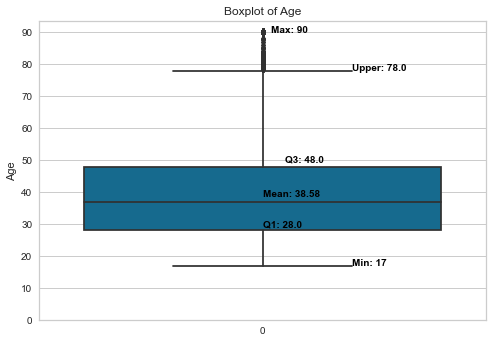

In [304]:
fontcolor= 'black'
plt.title('Boxplot of Age')
boxplot = sns.boxplot(data=df.age)
boxplot.set_xlabel('Age')
boxplot.set_yticks(np.arange(0, 100, 10))
mean = np.round(df.age.mean(), 2)
max = df.age.max()
min = df.age.min()
q1 = df.age.quantile(0.25)
q3 = df.age.quantile(0.75)
iqr = q3 - q1
upper_whisker = np.round(q3 + (1.5 * iqr), 2)
lower_whisker = np.round(q1 - (1.5 * iqr), 2)

boxplot.text(0 + 0.02, max, f'Max: {max}', size=10, color=fontcolor, weight='semibold')
boxplot.text(0 + 0.2, min, f'Min: {min}', size=10, color=fontcolor, weight='semibold')
boxplot.text(0, mean, f'Mean: {mean}', size=10, color=fontcolor, weight='semibold')
boxplot.text(0, q1 + 1, f'Q1: {q1}', size=10, color=fontcolor, weight='semibold')
boxplot.text(0+0.05, q3 + 1.5, f'Q3: {q3}', size=10, color=fontcolor, weight='semibold')
boxplot.text(0+ 0.2, upper_whisker, f'Upper: {upper_whisker}', size=10, color=fontcolor, weight='semibold')
if lower_whisker > 0:
    boxplot.text(0+ 0.2, lower_whisker, f'Lower: {lower_whisker}', size=10, color=fontcolor, weight='semibold')
plt.ylabel('Age')
plt.xlabel("")
plt.show()

Histogram of Age

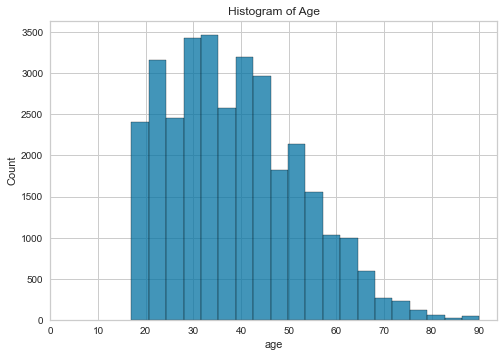

In [112]:
sns.histplot(df.age, bins=20)
plt.xticks(np.arange(0, df.age.max()+10, 10))
plt.title('Histogram of Age')
plt.show()

capital-gain

Histogram Of Capital Gain

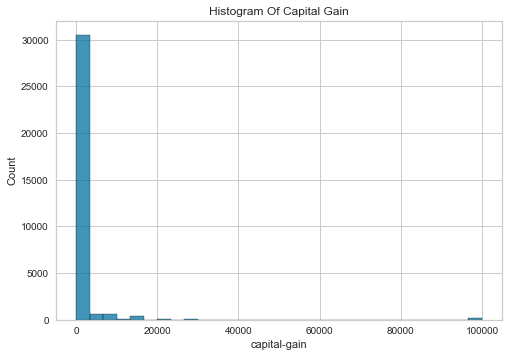

In [113]:
counts = df['capital-gain'].value_counts()
mean = df['capital-gain'].mean()
plt.title("Histogram Of Capital Gain")
sns.histplot(df['capital-gain'], bins=30)
plt.xticks(np.arange(0, df['capital-gain'].max() + 20000, 20000))
plt.show()

Boxplot of capital-gain

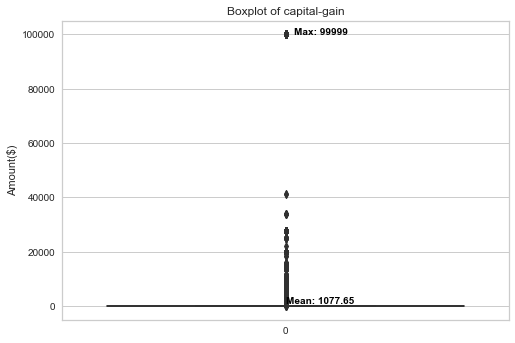

In [305]:
x_offset = 0.2
fontcolor= 'black'
plt.title('Boxplot of capital-gain')
capital_gain_boxplot = sns.boxplot(data=df['capital-gain'])
capital_gain_boxplot.set_xlabel('capital-gain')
mean = np.round(df['capital-gain'].mean(), 2)
max = df['capital-gain'].max()
min = df['capital-gain'].min()
q1 = df['capital-gain'].quantile(0.25)
q3 = df['capital-gain'].quantile(0.75)
iqr = q3 - q1
upper_whisker = np.round(q3 + (1.5 * iqr), 2)
lower_whisker = np.round(q1 - (1.5 * iqr), 2)
capital_gain_boxplot.text(0 + 0.02, max, f'Max: {max}', size=10, color=fontcolor, weight='semibold')
capital_gain_boxplot.text(0, mean, f'Mean: {mean}', size=10, color=fontcolor, weight='semibold')

if lower_whisker > 0:
    capital_gain_boxplot.text(0+ 0.2, lower_whisker, f'Lower: {lower_whisker}', size=10, color=fontcolor, weight='semibold')
plt.ylabel('Amount($)')
plt.xlabel("")
plt.show()

capital-loss

Histogram of Capital Loss

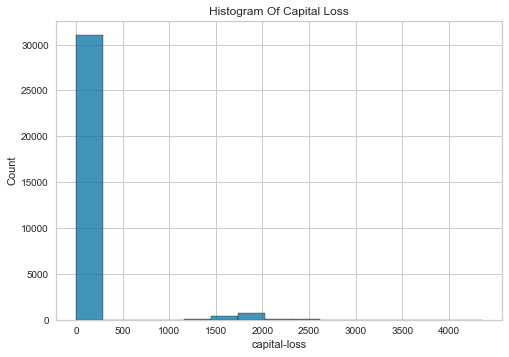

In [115]:
counts = df['capital-loss'].value_counts()
mean = df['capital-loss'].mean()
plt.title("Histogram Of Capital Loss")
plt.xticks(np.arange(0, df['capital-loss'].max(), 500))
sns.histplot(df['capital-loss'], bins=15)
plt.show()

Boxplot of capital-loss

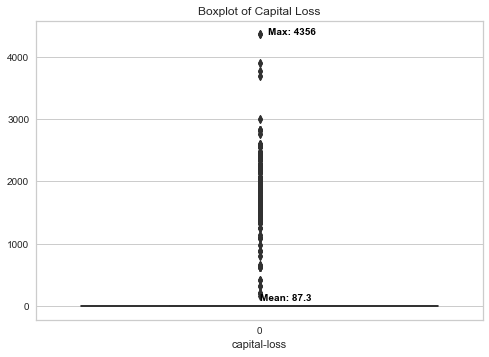

In [116]:
x_offset = 0.2
fontcolor= 'black'
plt.title('Boxplot of Capital Loss')
capital_loss_boxplot = sns.boxplot(data=df['capital-loss'], )
capital_loss_boxplot.set_xlabel('capital-loss')
mean = np.round(df['capital-loss'].mean(), 2)
max = df['capital-loss'].max()
min = df['capital-loss'].min()
q1 = df['capital-loss'].quantile(0.25)
q3 = df['capital-loss'].quantile(0.75)
iqr = q3 - q1
upper_whisker = np.round(q3 + (1.5 * iqr), 2)
lower_whisker = np.round(q1 - (1.5 * iqr), 2)
capital_loss_boxplot.text(0 + 0.02, max, f'Max: {max}', size=10, color=fontcolor, weight='semibold')
capital_loss_boxplot.text(0, mean, f'Mean: {mean}', size=10, color=fontcolor, weight='semibold')

if lower_whisker > 0:
    capital_loss_boxplot.text(0+ 0.2, lower_whisker, f'Lower: {lower_whisker}', size=10, color=fontcolor, weight='semibold')
plt.show()

hours-per-week

Histogram of Hours Per Week

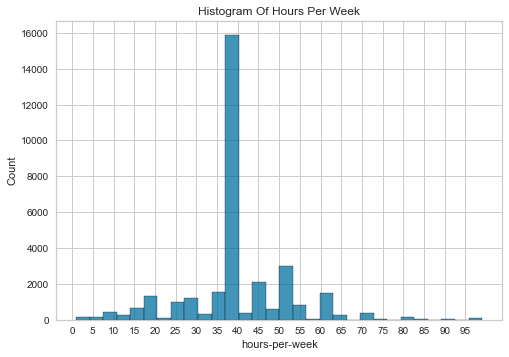

In [117]:
plt.title("Histogram Of Hours Per Week")
sns.histplot(df['hours-per-week'], bins=30)
plt.xticks(np.arange(0, df['hours-per-week'].max(), 5))
plt.show()

Boxplot of hours-per-week

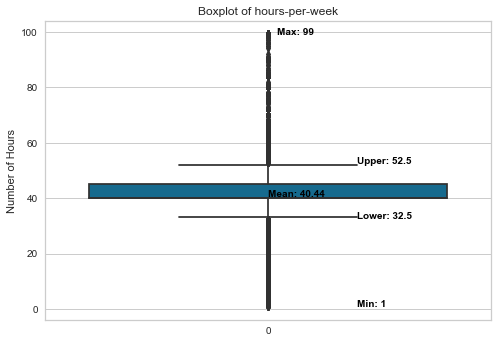

In [306]:
fontcolor= 'black'
plt.title('Boxplot of hours-per-week')
boxplot = sns.boxplot(data=df['hours-per-week'])
boxplot.set_xlabel('hours-per-week')
mean = np.round(df["hours-per-week"].mean(), 2)
max = df["hours-per-week"].max()
min = df["hours-per-week"].min()
q1 = df["hours-per-week"].quantile(0.25)
q3 = df["hours-per-week"].quantile(0.75)
iqr = q3 - q1
upper_whisker = np.round(q3 + (1.5 * iqr), 2)
lower_whisker = np.round(q1 - (1.5 * iqr), 2)

boxplot.text(0 + 0.02, max, f'Max: {max}', size=10, color=fontcolor, weight='semibold')
boxplot.text(0 + 0.2, min, f'Min: {min}', size=10, color=fontcolor, weight='semibold')
boxplot.text(0, mean, f'Mean: {mean}', size=10, color=fontcolor, weight='semibold')
boxplot.text(0+ 0.2, upper_whisker, f'Upper: {upper_whisker}', size=10, color=fontcolor, weight='semibold')
if lower_whisker > 0:
    boxplot.text(0+ 0.2, lower_whisker, f'Lower: {lower_whisker}', size=10, color=fontcolor, weight='semibold')
plt.ylabel('Number of Hours')
plt.xlabel("")
plt.show()

native_country

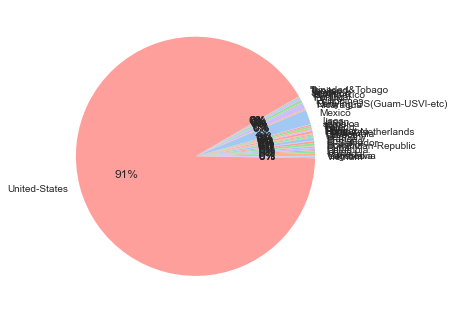

In [119]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
countries = df.groupby('native-country').size()
#create pie chart
plt.pie(countries, labels = countries.index, colors = colors, autopct='%.0f%%')
plt.show()

countries.sort_values(ascending=False)
countries_amount = pd.DataFrame(countries[:-10], columns=['Amount']).sort_values(by=['Amount'], ascending=False)
countries_amount

# remove rows where there are less than 10 people from from there
countries_to_remove = countries_amount.loc[countries_amount.Amount <= 10, :].index


<h1>Removing All Outliers</h1>

In [120]:
capital_gain_filter = df['capital-gain'] > 20000
capital_loss_filter = df['capital-loss'] > 0
hours_per_week_filter = (df['hours-per-week'] < 20) | (df['hours-per-week'] > 60)
countries_filter = (df['native-country'].isin(countries_to_remove))
outliers = df.loc[((capital_gain_filter)| (capital_loss_filter) | hours_per_week_filter), :]
outliers.shape
new_df = df.loc[~df.index.isin(outliers.index), :]
new_df.shape

(28143, 15)

<h1>Exploratory Data Analysis</h1>

Income

Income Distribution

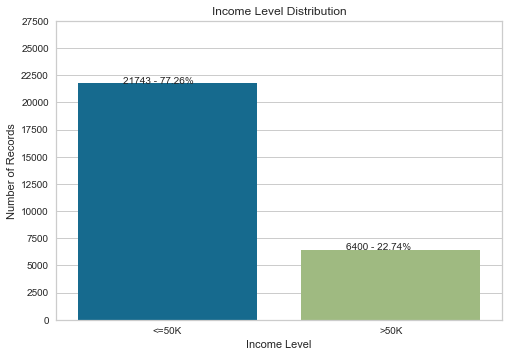

In [307]:
income_dist = new_df.groupby('income').size()
income_dist_barplot = sns.barplot(x=income_dist.index, y=income_dist.values)
income_dist_barplot.set_yticks(np.arange(0, 30000, 2500))
income_dist_barplot.text(-0.2, income_dist.max() + 10, f'{income_dist.max()} - {np.round(income_dist.max() / len(new_df) * 100, 2)}%', size=10)
income_dist_barplot.text(0.8, income_dist.min() + 10, f'{income_dist.min()} - {np.round(income_dist.min() / len(new_df) * 100, 2)}%', size=10)
income_dist_barplot.set_ylabel('Number of Records')
income_dist_barplot.set_title('Income Level Distribution')
income_dist_barplot.get_xticks()
plt.xlabel('Income Level')
plt.show()

Age

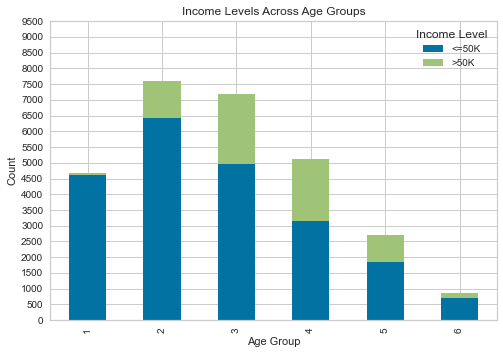

In [308]:
# Binning Age
age_df = new_df.loc[:, ['age', 'income']]
age_bins = [0, 24, 34, 44, 54, 64, new_df.age.max()]
age_df.loc[:, 'age_group'] = pd.cut(new_df.age, bins=age_bins, include_lowest=False)
age_df.sort_values(by='age_group', ascending=True, inplace=True)
age_df.loc[:, 'age_group'] = age_df.loc[:, 'age_group'].astype('str')
age_df_to_plot = pd.DataFrame()

for age_group in age_df.age_group.unique():
    high_income = len(age_df.loc[(age_df['income'] == '>50K') & (age_df.age_group == age_group), :])
    low_income = len(age_df.loc[(age_df['income'] == '<=50K') & (age_df.age_group == age_group), :])
    group_info = pd.DataFrame({'age_group': [str(age_group)], '<=50K': [low_income], '>50K': [high_income]})
    #print(group_info)
    age_df_to_plot = pd.concat([age_df_to_plot, group_info], axis=0)

age_df_to_plot.index = [1, 2, 3, 4, 5, 6]
age_df_to_plot[['<=50K', '>50K']].plot(kind='bar', stacked=True)
plt.legend(title='Income Level')
plt.title('Income Levels Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.yticks(np.arange(0, 10000, 500))
plt.show()

Sex

In [123]:
female_high_income = len(new_df[(new_df['sex'] == 'Female') & (new_df['income'] == '>50K')])
female_low_income = len(new_df[(new_df['sex'] == 'Female') & (new_df['income'] == '<=50K')])

male_high_income = len(new_df[(new_df['sex'] == 'Male') & (new_df['income'] == '>50K')])
male_low_income = len(new_df[(new_df['sex'] == 'Male') & (new_df['income'] == '<=50K')])

male_female_income = pd.DataFrame(data={'lower_income': [male_low_income, female_low_income], 'higher_income': [male_high_income, female_high_income]}, index=['Male', 'Female'])
male_female_income


,lower_income,higher_income
Male,13393,5427
Female,8350,973


Income Distribution Of Male and Female

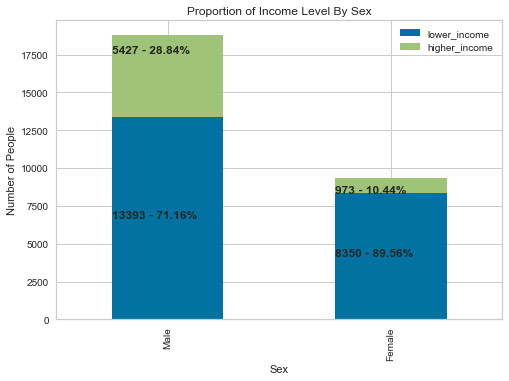

In [124]:
ax = male_female_income.plot(kind='bar', stacked=True)
plt.legend(loc='upper right')

male_higher_income_bar_y = ax.containers[0][1].get_height()
male_lower_income_bar_y = ax.containers[0][0].get_height()
plt.text(-0.25, male_low_income/2, f'{male_low_income} - {np.round(male_low_income / (male_low_income+male_high_income) * 100, 2)}%', weight='semibold')
plt.text(-0.25, male_lower_income_bar_y+(male_higher_income_bar_y/2), f'{male_high_income} - {np.round(male_high_income / (male_low_income+male_high_income) * 100, 2)}%', weight='semibold')

female_higher_income_bar_y = ax.containers[1][1].get_height()
female_lower_income_bar_y = ax.containers[1][0].get_height()
plt.text(1-0.25, female_low_income/2, f'{female_low_income} - {np.round(female_low_income / (female_low_income+female_high_income) * 100, 2)}%', weight='semibold')
plt.text(1-0.25, female_lower_income_bar_y+(female_higher_income_bar_y*3), f'{female_high_income} - {np.round(female_high_income / (female_low_income+female_high_income) * 100, 2)}%', weight='semibold')
ax.set_title('Proportion of Income Level By Sex')
ax.set_ylabel('Number of People')
ax.set_xlabel('Sex')
plt.show()

work-class

In [125]:
higher_income = new_df[new_df.income == '>50K']
lower_income = new_df[new_df.income == '<=50K']

# Distribution of working classes 
overall_working_dist = new_df['work-class'].value_counts()

# Distribution among high income - There a no high income who have never-worked
higher_income_working_dist = higher_income['work-class'].value_counts()

# Distribution among low income
lower_income_working_dist = lower_income['work-class'].value_counts()

all_working_class_dists = pd.concat([overall_working_dist, higher_income_working_dist, lower_income_working_dist], axis=1, ignore_index=True).fillna(0)
all_working_class_dists.columns = ['OVERALL', 'HIGH-INCOME', 'LOW-INCOME']

all_working_class_dists['PROPORTION-HIGH-INCOME'] = all_working_class_dists['HIGH-INCOME'] / all_working_class_dists['OVERALL'] * 100
all_working_class_dists['PROPORTION-LOW-INCOME'] = all_working_class_dists['LOW-INCOME'] / all_working_class_dists['OVERALL'] * 100
all_working_class_dists = all_working_class_dists.apply(lambda x : np.round(x, 2))
all_working_class_dists


,OVERALL,HIGH-INCOME,LOW-INCOME,PROPORTION-HIGH-INCOME,PROPORTION-LOW-INCOME
Private,21496,4289.0,17207,19.95,80.05
Self-emp-not-inc,1964,511.0,1453,26.02,73.98
Local-gov,1831,523.0,1308,28.56,71.44
State-gov,1121,299.0,822,26.67,73.33
Federal-gov,860,332.0,528,38.60,61.40
Self-emp-inc,856,446.0,410,52.10,47.90
Without-pay,10,0.0,10,0.00,100.00
Never-worked,5,0.0,5,0.00,100.00


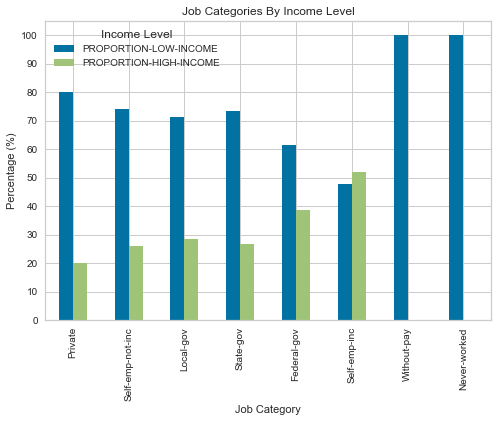

In [126]:
higher_income_working_df = pd.DataFrame(data=all_working_class_dists['HIGH-INCOME'], columns=['HIGH-INCOME'])
lower_income_working_df = pd.DataFrame(data=all_working_class_dists['LOW-INCOME'], columns=['LOW-INCOME'])

higher_income_working_df['PROPORTION'] = higher_income_working_df/ len(higher_income) * 100
lower_income_working_df['PROPORTION'] = lower_income_working_df/ len(lower_income) * 100

all_working_class_dists[['PROPORTION-LOW-INCOME', 'PROPORTION-HIGH-INCOME']].plot(kind='bar')
plt.title('Job Categories By Income Level')
plt.legend(title='Income Level', loc='upper left', fontsize='small')
plt.xlabel('Job Category')
plt.ylabel('Percentage (%)')
plt.yticks(np.arange(0, 105, 10))
plt.show()

Education

In [127]:
higher_income = new_df[new_df.income == '>50K']
lower_income = new_df[new_df.income == '<=50K']

# Distribution of working classes 
overall_education_dist = new_df['education'].value_counts().sort_values(ascending=False)

# Distribution among high income - There a no high income who have never-worked
higher_income_education_dist = higher_income['education'].value_counts()

# Distribution among low income
lower_income_education_dist = lower_income['education'].value_counts()

all_education_dists = pd.concat([overall_education_dist, higher_income_education_dist, lower_income_education_dist], axis=1, ignore_index=True).fillna(0)
all_education_dists.columns = ['OVERALL', 'HIGH-INCOME', 'LOW-INCOME']

all_education_dists['PROPORTION-HIGH-INCOME'] = all_education_dists['HIGH-INCOME'] / all_education_dists['OVERALL'] * 100
all_education_dists['PROPORTION-LOW-INCOME'] = all_education_dists['LOW-INCOME'] / all_education_dists['OVERALL'] * 100
all_education_dists = all_education_dists.apply(lambda x : np.round(x, 2))
all_education_dists

,OVERALL,HIGH-INCOME,LOW-INCOME,PROPORTION-HIGH-INCOME,PROPORTION-LOW-INCOME
HS-grad,9364,1412.0,7952,15.08,84.92
Some-college,6288,1165.0,5123,18.53,81.47
Bachelors,4616,1833.0,2783,39.71,60.29
Masters,1409,755.0,654,53.58,46.42
Assoc-voc,1254,318.0,936,25.36,74.64
Assoc-acdm,937,226.0,711,24.12,75.88
11th,929,51.0,878,5.49,94.51
10th,777,45.0,732,5.79,94.21
7th-8th,551,34.0,517,6.17,93.83
9th,465,23.0,442,4.95,95.05


Pie Chart Of Education Levels

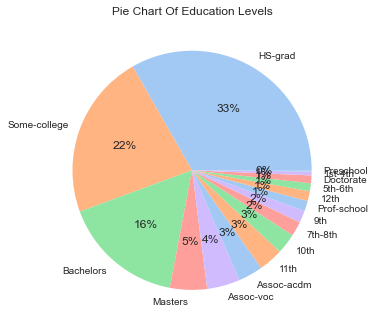

In [310]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(all_education_dists['OVERALL'], labels = all_education_dists.index, colors = colors, autopct='%.0f%%')
plt.title('Pie Chart Of Education Levels')
plt.show()

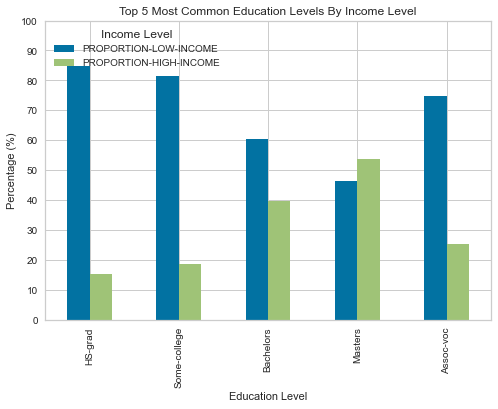

In [129]:
# Top 5 Education Levels Overall
all_education_dists.loc[:, ['PROPORTION-LOW-INCOME', 'PROPORTION-HIGH-INCOME']][:5].plot(kind='bar')
plt.title('Top 5 Most Common Education Levels By Income Level')
plt.legend(title='Income Level', loc='upper left', fontsize='small')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.yticks(np.arange(0, 105, 10))
plt.show()

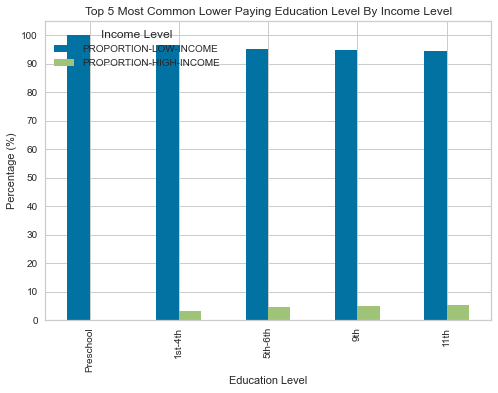

In [130]:
# Education Levels With More Lower Income
education_top5_low_income = all_education_dists.sort_values(by='PROPORTION-LOW-INCOME', axis=0, ascending=False)
education_top5_low_income.loc[:, ['PROPORTION-LOW-INCOME', 'PROPORTION-HIGH-INCOME']][:5].plot(kind='bar')
plt.title('Top 5 Most Common Lower Paying Education Level By Income Level')
plt.legend(title='Income Level', loc='upper left', fontsize='small')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.yticks(np.arange(0, 105, 10))
plt.show()

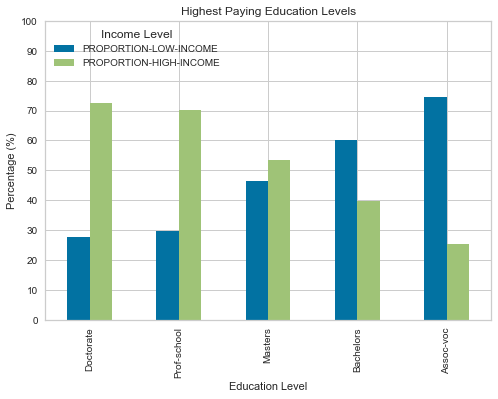

In [315]:
# Education Levels With More Higher Income
education_top5_high_income = all_education_dists.sort_values(by='PROPORTION-HIGH-INCOME', axis=0, ascending=False)
education_top5_high_income.loc[:, ['PROPORTION-LOW-INCOME', 'PROPORTION-HIGH-INCOME']][:5].plot(kind='bar')
plt.title('Highest Paying Education Levels')
plt.legend(title='Income Level', loc='upper left', fontsize='small')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.yticks(np.arange(0, 105, 10))
plt.show()

<h1>Clustering Analysis</h1>

In [132]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import sparse
from sklearn.compose import ColumnTransformer
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from scipy.spatial.distance import euclidean

In [133]:
new_df

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [134]:
numerical_columns = new_df._get_numeric_data().columns
categorical_columns = list(set(new_df.columns) - set(numerical_columns) - set(['income']))

<h2>High Income Clustering</h2>

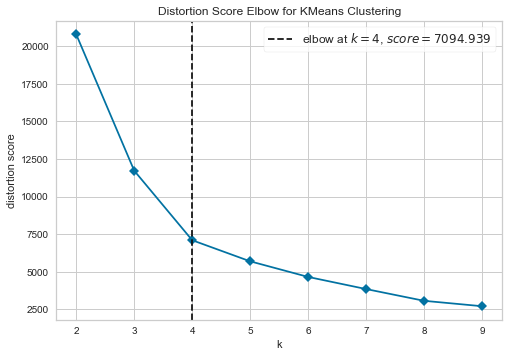

In [135]:
high_income = new_df.loc[new_df.income == '>50K', :]
high_income_scaled = StandardScaler().fit_transform(pd.get_dummies(high_income.drop('income', axis=1)))
pca = PCA(2)
high_income_reduced = pca.fit_transform(high_income_scaled)
high_income_reduced_df = pd.DataFrame(high_income_reduced, index=high_income.index, columns=['PC1','PC2'])

# Elbow Plot
elbow_visualiser = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), timings=False)
elbow_visualiser.fit(high_income_reduced)
elbow_visualiser.show()
plt.show()


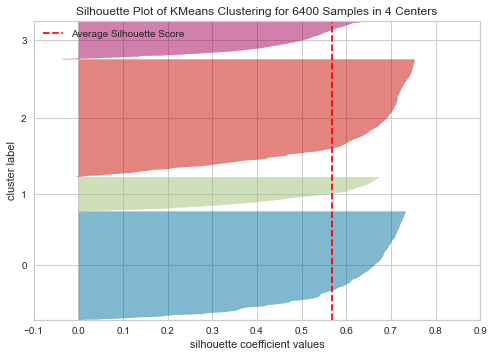

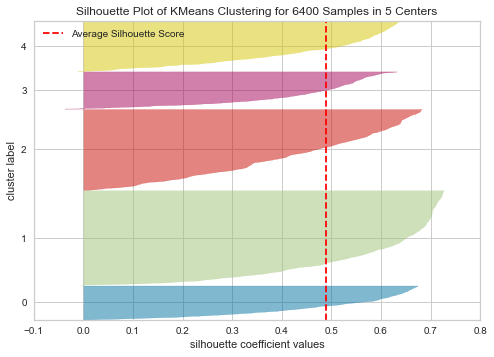

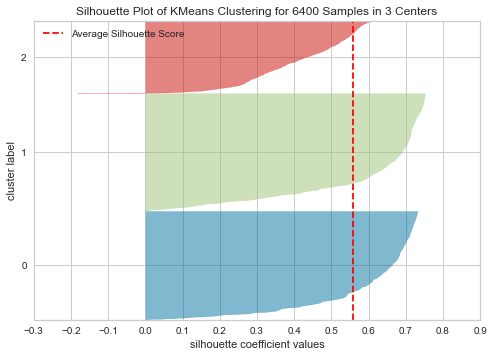

In [136]:
# Silhouette Plot
silhouette_visualiser = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')
silhouette_visualiser.fit(high_income_reduced)
silhouette_visualiser.show()
plt.show()

# Silhouette Plot
silhouette_visualiser = SilhouetteVisualizer(KMeans(5, random_state=42), colors='yellowbrick')
silhouette_visualiser.fit(high_income_reduced)
silhouette_visualiser.show()
plt.show()

# Silhouette Plot
silhouette_visualiser = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
silhouette_visualiser.fit(high_income_reduced)
silhouette_visualiser.show()
plt.show()


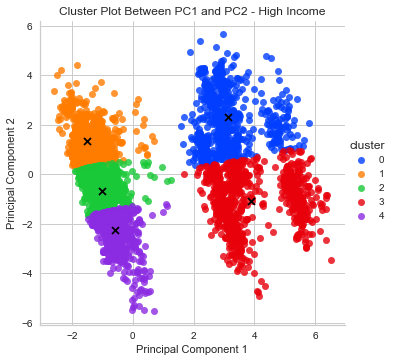

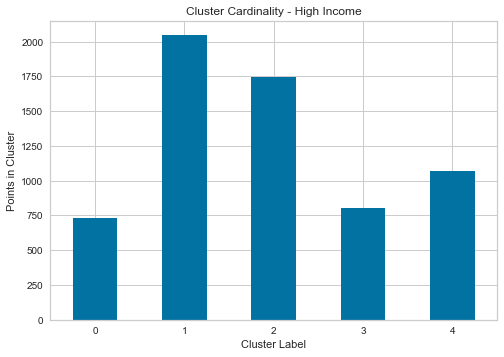

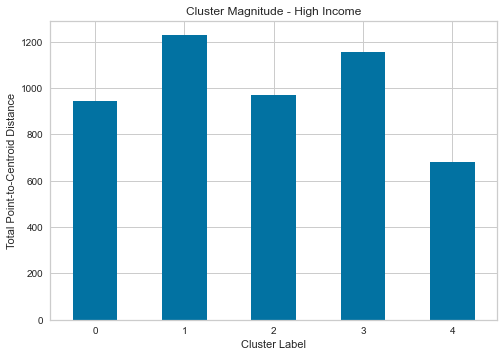

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


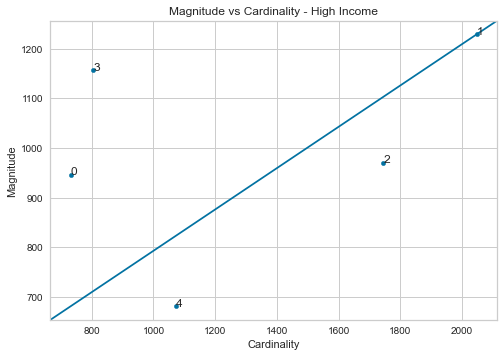

In [311]:
km = KMeans(5, random_state=42)
high_income_reduced_df['cluster'] = km.fit_predict(high_income_reduced)
sns.lmplot(x='PC1', y='PC2', data=high_income_reduced_df, ci=None, hue='cluster', fit_reg=False, palette=sns.color_palette('bright'))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', color='black')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.title(f'Cluster Plot Between PC1 and PC2 - High Income')
plt.show()

plot_cluster_cardinality(km.labels_)
plt.title('Cluster Cardinality - High Income')
plt.show()

plot_cluster_magnitude(high_income_reduced, km.labels_, km.cluster_centers_, euclidean)
plt.title('Cluster Magnitude - High Income')
plt.show()

plot_magnitude_vs_cardinality(high_income_reduced, km.labels_, km.cluster_centers_, euclidean)
plt.title('Magnitude vs Cardinality - High Income')
plt.show()

<h2>Low Income Clustering</h2>

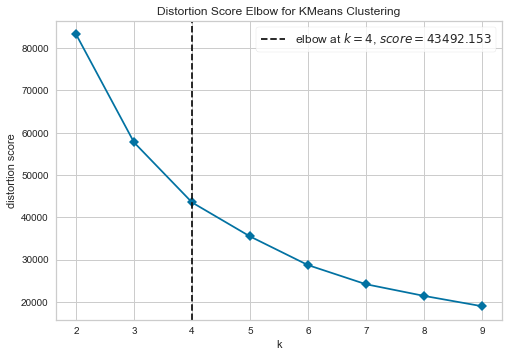

In [141]:
low_income = new_df.loc[new_df.income == '<=50K', :]
low_income_scaled = StandardScaler().fit_transform(pd.get_dummies(low_income.drop('income', axis=1)))
pca = PCA(2)
low_income_reduced = pca.fit_transform(low_income_scaled)
low_income_reduced_df = pd.DataFrame(low_income_reduced, index=low_income.index, columns=['PC1','PC2'])

# Elbow Plot
elbow_visualiser = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), timings=False)
elbow_visualiser.fit(low_income_reduced)
elbow_visualiser.show()
plt.show()

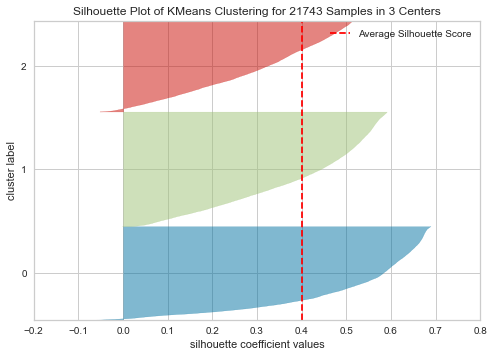

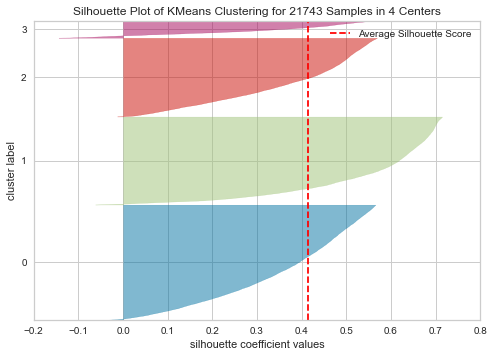

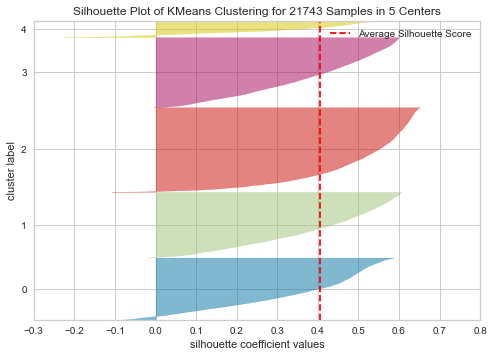

In [142]:
# Silhouette Plot
silhouette_visualiser = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
silhouette_visualiser.fit(low_income_reduced)
silhouette_visualiser.show()
plt.show()

# Silhouette Plot
silhouette_visualiser = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')
silhouette_visualiser.fit(low_income_reduced)
silhouette_visualiser.show()
plt.show()

# Silhouette Plot
silhouette_visualiser = SilhouetteVisualizer(KMeans(5, random_state=42), colors='yellowbrick')
silhouette_visualiser.fit(low_income_reduced)
silhouette_visualiser.show()
plt.show()


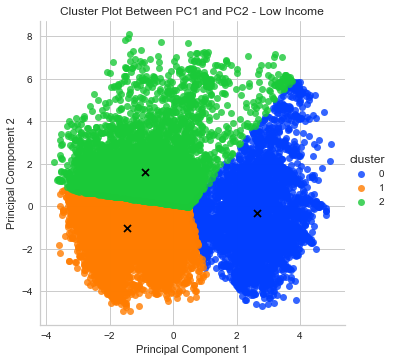

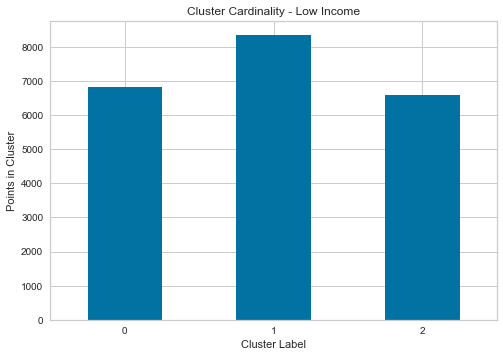

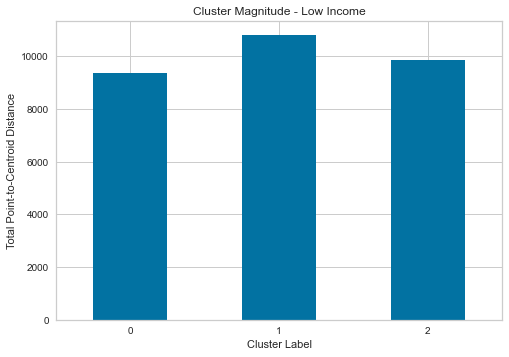

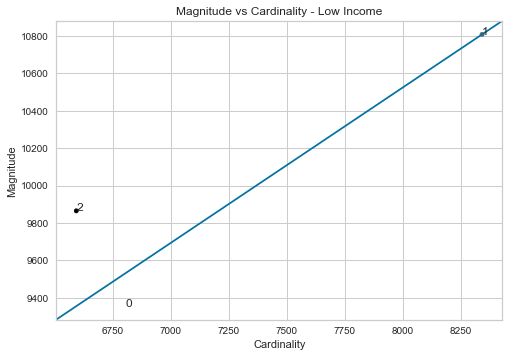

In [143]:
km = KMeans(3, random_state=42)
low_income_reduced_df['cluster'] = km.fit_predict(low_income_reduced)
sns.lmplot(x='PC1', y='PC2', data=low_income_reduced_df, ci=None, hue='cluster', fit_reg=False, palette=sns.color_palette('bright'))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', color='black')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.title(f'Cluster Plot Between PC1 and PC2 - Low Income')
plt.show()

plot_cluster_cardinality(km.labels_)
plt.title('Cluster Cardinality - Low Income')
plt.show()

plot_cluster_magnitude(low_income_reduced, km.labels_, km.cluster_centers_, euclidean)
plt.title('Cluster Magnitude - Low Income')
plt.show()

plot_magnitude_vs_cardinality(low_income_reduced, km.labels_, km.cluster_centers_, euclidean)
plt.title('Magnitude vs Cardinality - Low Income')
plt.show()

<h1>Machine Learning</h1>

In [149]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize

In [153]:
processed_df = new_df.rename({'income': 'above_50K'}, axis=1)
processed_df.loc[:, 'above_50K'] = processed_df.loc[:, 'above_50K'].map({'<=50K': 0, '>50K': 1})
print(processed_df.shape)

# Train, Test, Holdout Split
train, test = train_test_split(processed_df, test_size=0.3, stratify=processed_df.above_50K, random_state=42)
test, holdout = train_test_split(test, test_size=1/3, stratify=test.above_50K, random_state=42)
print(train.shape, test.shape, holdout.shape)

(28143, 15)
(19700, 15) (5628, 15) (2815, 15)


In [312]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,above_50K
count,19700.000000,1.970000e+04,19700.000000,19700.000000,19700.0,19700.000000,19700.000000
mean,38.268731,1.907402e+05,10.037259,561.782487,0.0,40.656853,0.227411
std,13.100279,1.058583e+05,2.535505,2259.724284,0.0,8.405663,0.419171
min,17.000000,1.228500e+04,1.000000,0.000000,0.0,20.000000,0.000000
25%,28.000000,1.185798e+05,9.000000,0.000000,0.0,40.000000,0.000000
50%,37.000000,1.795630e+05,10.000000,0.000000,0.0,40.000000,0.000000
75%,47.000000,2.376225e+05,12.000000,0.000000,0.0,45.000000,0.000000
max,90.000000,1.455435e+06,16.000000,15831.000000,0.0,60.000000,1.000000


In [313]:
test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,above_50K
count,5628.000000,5628.000000,5628.000000,5628.000000,5628.0,5628.000000,5628.000000
mean,38.216240,191598.586709,10.040512,568.650853,0.0,40.625267,0.227434
std,13.094656,104501.661836,2.519050,2297.006399,0.0,8.459656,0.419213
min,17.000000,13769.000000,1.000000,0.000000,0.0,20.000000,0.000000
25%,28.000000,120338.500000,9.000000,0.000000,0.0,40.000000,0.000000
50%,37.000000,180139.500000,10.000000,0.000000,0.0,40.000000,0.000000
75%,47.000000,240095.000000,12.000000,0.000000,0.0,45.000000,0.000000
max,90.000000,972354.000000,16.000000,18481.000000,0.0,60.000000,1.000000


In [314]:
holdout.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,above_50K
count,2815.000000,2.815000e+03,2815.000000,2815.000000,2815.0,2815.000000,2815.000000
mean,38.122202,1.913409e+05,10.027353,520.578686,0.0,40.903730,0.227353
std,13.014752,1.105734e+05,2.519074,2142.866060,0.0,8.142104,0.419197
min,17.000000,1.984700e+04,1.000000,0.000000,0.0,20.000000,0.000000
25%,27.000000,1.160480e+05,9.000000,0.000000,0.0,40.000000,0.000000
50%,37.000000,1.796410e+05,10.000000,0.000000,0.0,40.000000,0.000000
75%,47.000000,2.403195e+05,12.000000,0.000000,0.0,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,15024.000000,0.0,60.000000,1.000000


In [156]:
# Set training labels and target
X_train =  train.drop('above_50K', axis=1)
y_train = train.above_50K

X_test = test.drop('above_50K', axis=1)
y_test = test.above_50K

X_holdout = holdout.drop('above_50K', axis=1)
y_holdout = holdout.above_50K

# Numerical And Categorical Features
numerical_columns = train.drop('above_50K', axis=1)._get_numeric_data().columns
categorical_columns = list(set(train.drop('above_50K',axis=1).columns) - set(numerical_columns))

In [157]:
# Prepare Data
def prepare_data(dataset, scale_data=False, normalise_data=False, categorical_columns=categorical_columns, numerical_columns=numerical_columns):

    dataset = pd.get_dummies(dataset, columns=categorical_columns)

    if normalise_data & scale_data:
        dataset = normalize(dataset)
        dataset = StandardScaler().fit_transform(dataset)
        return dataset
    elif normalise_data:
        return normalize(dataset)
    elif scale_data:
        return StandardScaler().fit_transform(dataset)
        
    return dataset

<h2>Logistic Regression</h2>

In [167]:
# Tune Hyperparamters using holdout set - recommended to scale data for regression algorithms. i.e center about 0
# https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia

# Prepare Dataset - scale the features
lr_X_train = prepare_data(X_train, scale_data=True)
lr_X_test = prepare_data(X_test, scale_data=True)
lr_X_holdout = prepare_data(X_holdout, scale_data=True)

# Base Logistic Regression Model
base_lr_model = LogisticRegression(random_state=42)
base_lr_model.fit(lr_X_train, y_train)

# Manually Selected Parameters - 
manual_lr_model = LogisticRegression(random_state=42, penalty='l1', C=1.5, solver='liblinear')
manual_lr_model.fit(lr_X_train, y_train)

# Grid Searched Parameters
lr_params = {
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear'], 
    'C': np.logspace(-4, 5, 30)}
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42), lr_params)
lr_grid_search.fit(lr_X_holdout, y_holdout)

grid_lr_model = lr_grid_search.best_estimator_
grid_lr_model.fit(lr_X_train, y_train)

LogisticRegression(C=0.007278953843983154, random_state=42, solver='liblinear')

<h1>Random Forest Classifier</h1><br>
# Look into partitioning #<br>
# Do not Apply One Hot Encoding To categorical featues, since it affects the purity of the trees<br>
# No transformation needed for tree based model, one hot would negatively affect the model<br>

In [169]:
# Prepare Data - Apply Only One Hot Encoding
rf_X_train = prepare_data(X_train)
rf_X_test = prepare_data(X_test)
rf_X_holdout = prepare_data(X_holdout)

# Base Model
base_rf_model = RandomForestClassifier(random_state=42)
base_rf_model.fit(rf_X_train, y_train)

# Manual Parameter Models
manual_rf_model = RandomForestClassifier(random_state=42, max_depth=6, class_weight='balanced')
manual_rf_model.fit(rf_X_train, y_train)

# Grid Search - Hyperparameter Tuning
rf_params = {
        'n_estimators': np.arange(50, 200, 50), 
        'max_depth': np.arange(2, 16, 2),
        'min_samples_split': np.arange(2, 10, 2)
        }
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params)
rf_grid_search.fit(rf_X_holdout, y_holdout)
grid_rf_model = rf_grid_search.best_estimator_
grid_rf_model.fit(rf_X_train , y_train)

RandomForestClassifier(max_depth=14, min_samples_split=4, random_state=42)

<h1>K Nearest Neighbors</h2>

In [174]:
# Tune hyperparameters using holdout set, normalise data as knn is affected by normalisation
# https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn

# Prepare Data - Normalise Data
knn_X_train = prepare_data(X_train, normalise_data=True)
knn_X_test = prepare_data(X_test, normalise_data=True)
knn_X_holdout = prepare_data(X_holdout, normalise_data=True)

# Base Model
base_knn_model = KNeighborsClassifier()
base_knn_model.fit(knn_X_train, y_train)

# Manual Model
manual_knn_model = KNeighborsClassifier(n_neighbors=20, leaf_size=50)
manual_knn_model.fit(knn_X_train, y_train)

# Hyperparameter tuning
knn_params = {'n_neighbors': [5, 10, 15, 50], 'leaf_size': [15, 30, 50]}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params)
knn_grid_search.fit(knn_X_holdout, y_holdout)
grid_knn_model = knn_grid_search.best_estimator_
grid_knn_model.fit(knn_X_train, y_train)

KNeighborsClassifier(leaf_size=15, n_neighbors=10)

<h1>Ensemble</h1>

Voting Classifier

In [176]:
#Fit model
voting_X_train = prepare_data(X_train, scale_data=True, normalise_data=True)
voting_X_test = prepare_data(X_test, scale_data=True, normalise_data=True)
voting_ensemble = VotingClassifier([('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('knn', KNeighborsClassifier())], voting='soft')
voting_ensemble.fit(voting_X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

<h1>Model Evaluations</h1>

In [242]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, auc, precision_recall_curve, accuracy_score, precision_score, recall_score

<h2>Logistic Regression Models</h2> 

<h3>Base Model Results</h3>

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4348
           1       0.71      0.57      0.63      1280

    accuracy                           0.85      5628
   macro avg       0.80      0.75      0.77      5628
weighted avg       0.84      0.85      0.84      5628



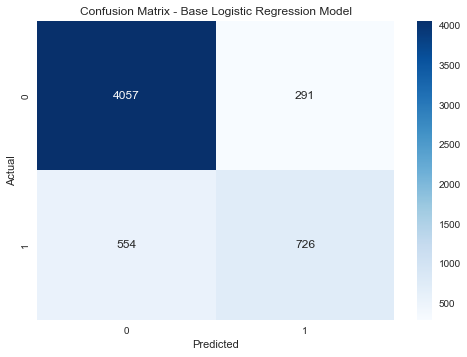

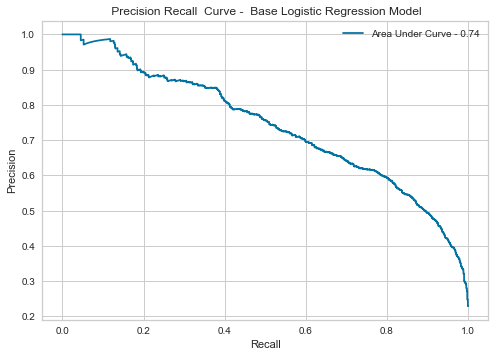

In [295]:
# Predictions
base_lr_pred = base_lr_model.predict(lr_X_test)
base_lr_pred_probs = base_lr_model.predict_proba(lr_X_test)

# Classification Report
print(classification_report(y_test, base_lr_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, base_lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Base Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, base_lr_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Base Logistic Regression Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()


<h3>Manual Model Results</h3>

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4348
           1       0.71      0.57      0.63      1280

    accuracy                           0.85      5628
   macro avg       0.80      0.75      0.77      5628
weighted avg       0.84      0.85      0.84      5628



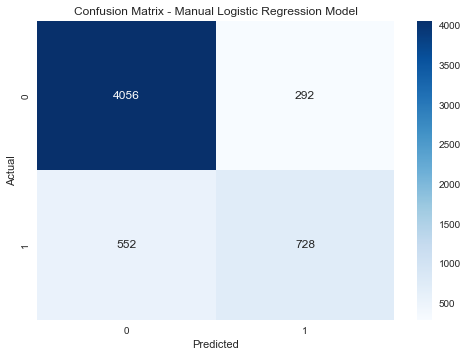

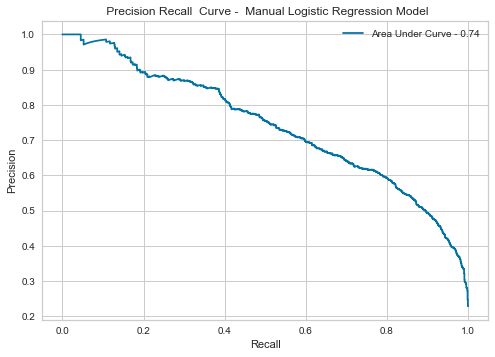

In [280]:
# Predictions
manual_lr_pred = manual_lr_model.predict(lr_X_test)
manual_lr_pred_probs = manual_lr_model.predict_proba(lr_X_test)

# Classification Report
print(classification_report(y_test, manual_lr_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, manual_lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Manual Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, manual_lr_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Manual Logistic Regression Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()


<h3>Hyper Tuned Model Results</h3>

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4348
           1       0.71      0.57      0.63      1280

    accuracy                           0.85      5628
   macro avg       0.80      0.75      0.77      5628
weighted avg       0.84      0.85      0.84      5628



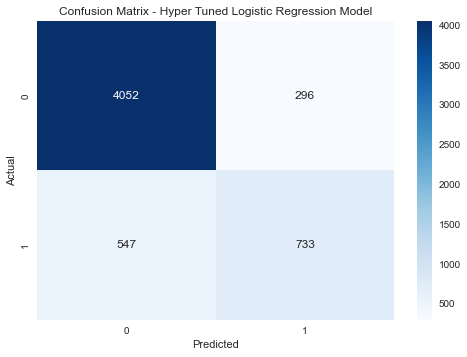

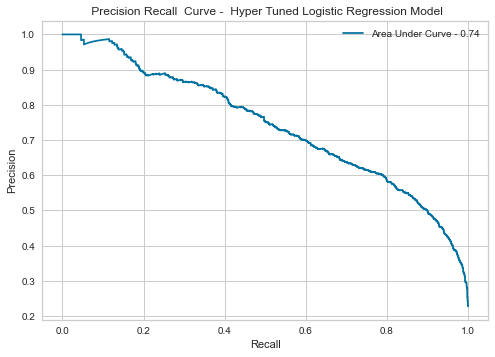

In [281]:
# Predictions
grid_lr_pred = grid_lr_model.predict(lr_X_test)
grid_lr_pred_probs = grid_lr_model.predict_proba(lr_X_test)

# Classification Report
print(classification_report(y_test, grid_lr_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, grid_lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Hyper Tuned Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, grid_lr_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Hyper Tuned Logistic Regression Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()

<h2>Random Forest Models</h2>

<h4>Base Model Results</h4>

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4348
           1       0.68      0.56      0.62      1280

    accuracy                           0.84      5628
   macro avg       0.78      0.74      0.76      5628
weighted avg       0.83      0.84      0.83      5628



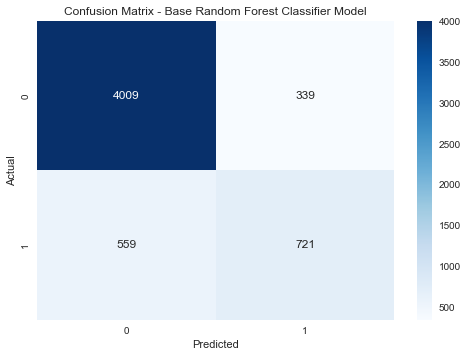

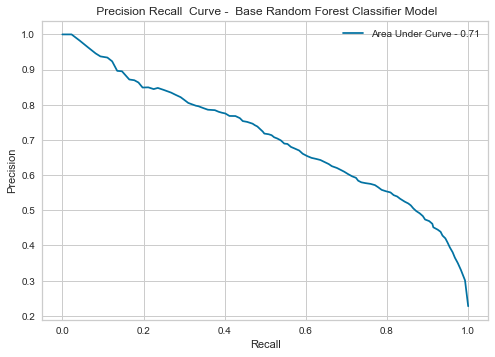

In [296]:
# Predictions
base_rf_pred = base_rf_model.predict(rf_X_test)
base_rf_pred_probs = base_rf_model.predict_proba(rf_X_test)

# Classification Report
print(classification_report(y_test, base_rf_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, base_rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Base Random Forest Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, base_rf_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Base Random Forest Classifier Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()

<h4>Manual Model Results</h4>

              precision    recall  f1-score   support

           0       0.95      0.70      0.81      4348
           1       0.47      0.88      0.61      1280

    accuracy                           0.74      5628
   macro avg       0.71      0.79      0.71      5628
weighted avg       0.84      0.74      0.76      5628



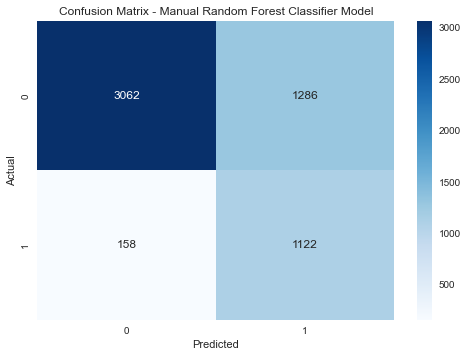

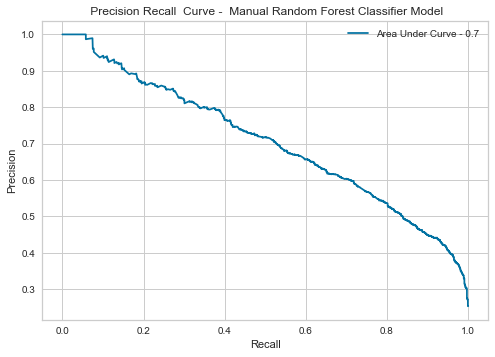

In [297]:
# Predictions
manual_rf_pred = manual_rf_model.predict(rf_X_test)
manual_rf_pred_probs = manual_rf_model.predict_proba(rf_X_test)

# Classification Report
print(classification_report(y_test, manual_rf_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, manual_rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Manual Random Forest Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, manual_rf_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Manual Random Forest Classifier Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()


<h4>Hyper Tuned Model Results</h4>

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4348
           1       0.74      0.53      0.62      1280

    accuracy                           0.85      5628
   macro avg       0.81      0.74      0.76      5628
weighted avg       0.84      0.85      0.84      5628



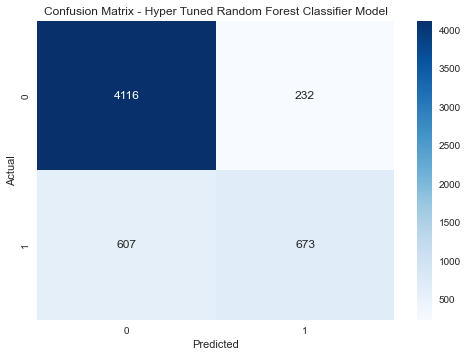

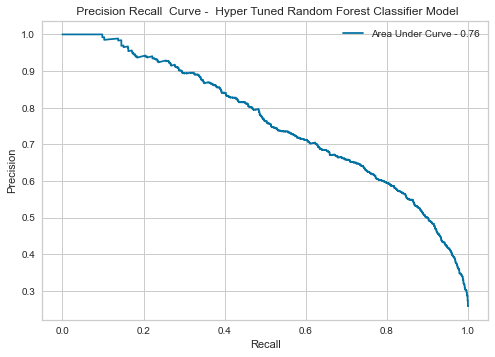

In [298]:
# Predictions
grid_rf_pred = grid_rf_model.predict(rf_X_test)
grid_rf_pred_probs = grid_rf_model.predict_proba(rf_X_test)

# Classification Report
print(classification_report(y_test, grid_rf_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, grid_rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Hyper Tuned Random Forest Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, grid_rf_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Hyper Tuned Random Forest Classifier Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()

<h2>K-Nearest Neighbors Models</h2>

<h4>Base Model Results</h4>

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4348
           1       0.53      0.48      0.50      1280

    accuracy                           0.79      5628
   macro avg       0.69      0.68      0.68      5628
weighted avg       0.78      0.79      0.78      5628



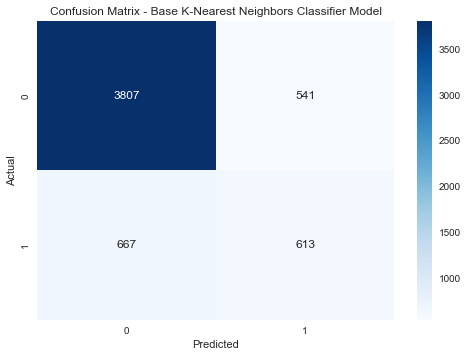

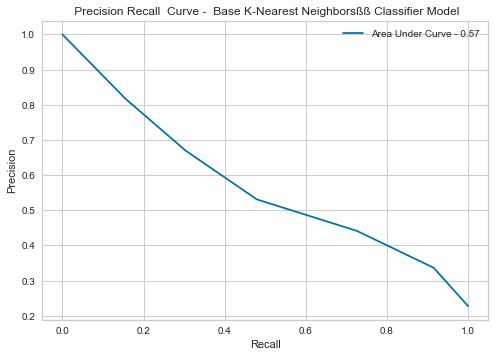

In [300]:
# Predictions
base_knn_pred = base_knn_model.predict(knn_X_test)
base_knn_pred_probs = base_knn_model.predict_proba(knn_X_test)

# Classification Report
print(classification_report(y_test, base_knn_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, base_knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Base K-Nearest Neighbors Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, base_knn_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Base K-Nearest Neighborsßß Classifier Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()

<h4>Manual Model Results</h4>

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4348
           1       0.69      0.34      0.46      1280

    accuracy                           0.81      5628
   macro avg       0.76      0.65      0.67      5628
weighted avg       0.80      0.81      0.79      5628



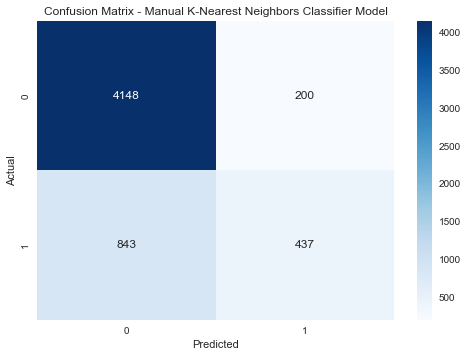

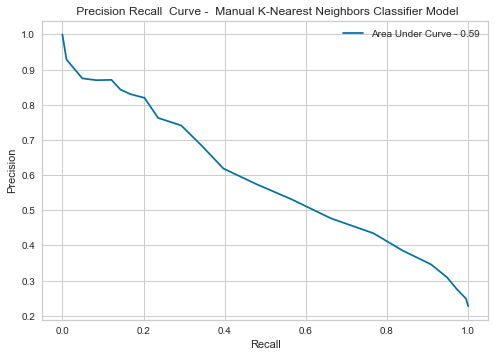

In [301]:
# Predictions
manual_knn_pred = manual_knn_model.predict(knn_X_test)
manual_knn_pred_probs = manual_knn_model.predict_proba(knn_X_test)

# Classification Report
print(classification_report(y_test, manual_knn_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, manual_knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Manual K-Nearest Neighbors Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, manual_knn_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Manual K-Nearest Neighbors Classifier Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()


<h4>Hyper Tuned Model Results</h4>

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4348
           1       0.00      0.00      0.00      1280

    accuracy                           0.77      5628
   macro avg       0.39      0.50      0.44      5628
weighted avg       0.60      0.77      0.67      5628



/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

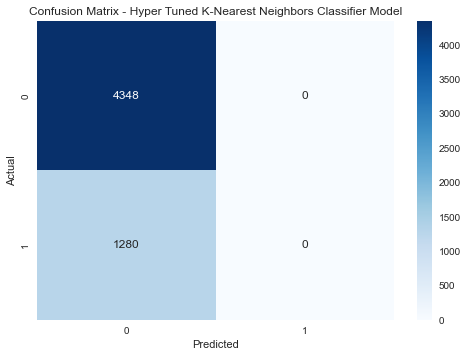

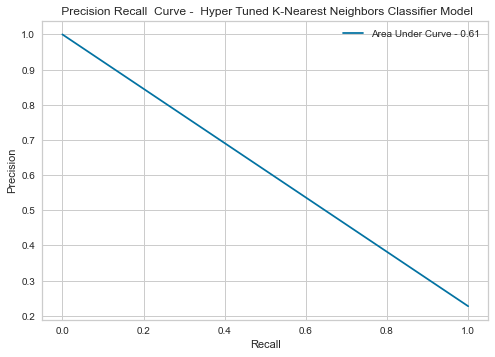

In [302]:
# Predictions
grid_knn_pred = grid_rf_model.predict(knn_X_test)
grid_knn_pred_probs = grid_rf_model.predict_proba(knn_X_test)

# Classification Report
print(classification_report(y_test, grid_knn_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, grid_knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Hyper Tuned K-Nearest Neighbors Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, grid_knn_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Hyper Tuned K-Nearest Neighbors Classifier Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()

<h2>Voting Classifier Ensemble Model</h2>

<h4>Model Results</h4>

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4348
           1       0.71      0.53      0.61      1280

    accuracy                           0.84      5628
   macro avg       0.79      0.73      0.75      5628
weighted avg       0.83      0.84      0.84      5628



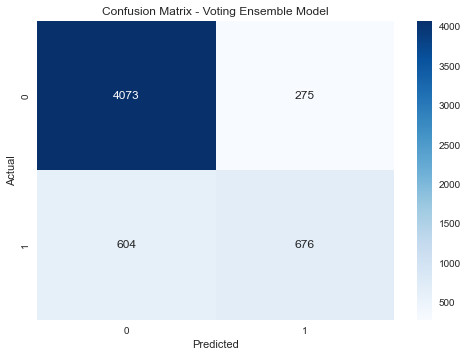

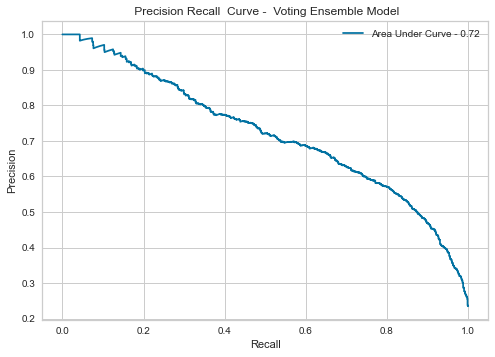

In [303]:
# Predictions
voting_pred = voting_ensemble.predict(voting_X_test)
voting_pred_probs = voting_ensemble.predict_proba(voting_X_test)

# Classification Report
print(classification_report(y_test, voting_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, voting_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Voting Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, voting_pred_probs[:, 1])
area_under_curve = auc(recall, precision)
plt.plot(recall, precision, label=f"Area Under Curve - {np.round(area_under_curve, 2)}")
plt.title(f' Precision Recall  Curve -  Voting Ensemble Model')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()